In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\DEEPAK KUMAR JHA\Desktop\new_spam\spam_ham_dataset.csv')

In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
3313,3750,spam,Subject: your 60 second auto loan will be acce...,1
1370,2689,ham,Subject: entex noms - lone star katy\r\ntom -\...,0
1566,2924,ham,"Subject: hpl nom for march 30 , 2001\r\n( see ...",0
3728,665,ham,Subject: re : brandywine meter # : 981225 ; ma...,0
2197,2672,ham,Subject: updated for march\r\ni have added a s...,0


In [4]:
df.shape

(5171, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [7]:
df.drop(columns=['label_num'], inplace= True)

In [8]:
df.sample(5)

,label,text
972,spam,Subject: shopping for [ mortgages ] made easy\...
3385,ham,"Subject: hpl nom for july 20 , 2000 - revision..."
934,ham,Subject: txu fuels / sds nomination for april ...
1149,spam,Subject: mortgage interest rates are at their ...
3970,ham,Subject: link to the hpl scheduling mailbox\r\...


In [9]:
df.rename(columns={'label':'target'}, inplace = True)
df.sample(5)

,target,text
4102,spam,Subject: epson inkjet cartridges from 5 . 99\r...
1552,ham,Subject: mobil beaumont - marol\r\njust want t...
1251,ham,"Subject: transport on koch , beginning wednesd..."
4083,spam,Subject: you need this abazis\r\nlook at this ...
2852,spam,Subject: anxiety ? valium and x . anax shipped...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [13]:
df.head()

,target,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

178

In [16]:
df= df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(4993, 2)

In [19]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1aa1e756fd0>,
 [Text(-0.6664987604061641, 0.8750882254818922, 'ham'),
  Text(0.6664986784744886, -0.8750882878840056, 'spam')],
 [Text(-0.3635447784033622, 0.4773208502628502, '70.72'),
  Text(0.36354473371335744, -0.4773208843003666, '29.28')])

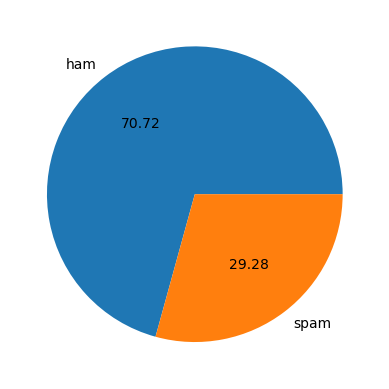

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")

In [21]:
#data is imbalanced

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\DEEPAK KUMAR
[nltk_data]     JHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
df['num_characters']

0        327
1         97
2       2524
3        414
4        336
        ... 
5165     869
5166     534
5167    1114
5169     573
5170    1114
Name: num_characters, Length: 4993, dtype: int64

In [25]:
df.head()

,target,text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [26]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0        68
1        24
2       551
3        49
4        71
       ... 
5165    197
5166    156
5167    306
5169    112
5170    200
Name: text, Length: 4993, dtype: int64

In [27]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
5165    [Subject, :, fw, :, crosstex, energy, ,, drisc...
5166    [Subject, :, put, the, 10, on, the, ft, the, t...
5167    [Subject, :, 3, /, 4, /, 2000, and, following,...
5169    [Subject, :, industrial, worksheets, for, augu...
5170    [Subject, :, important, online, banking, alert...
Name: text, Length: 4993, dtype: object

In [28]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [30]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Subject: enron methanol ; meter # : 988291\r\...
1       [Subject: hpl nom for january 9 , 2001\r\n( se...
2       [Subject: neon retreat\r\nho ho ho , we ' re a...
3       [Subject: photoshop , windows , office ., chea...
4       [Subject: re : indian springs\r\nthis deal is ...
                              ...                        
5165    [Subject: fw : crosstex energy , driscoll ranc...
5166    [Subject: put the 10 on the ft\r\nthe transpor...
5167    [Subject: 3 / 4 / 2000 and following noms\r\nh...
5169    [Subject: industrial worksheets for august 200...
5170    [Subject: important online banking alert\r\nde...
Name: text, Length: 4993, dtype: object

In [31]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [33]:
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe() #ham

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [34]:
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe() #spam

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

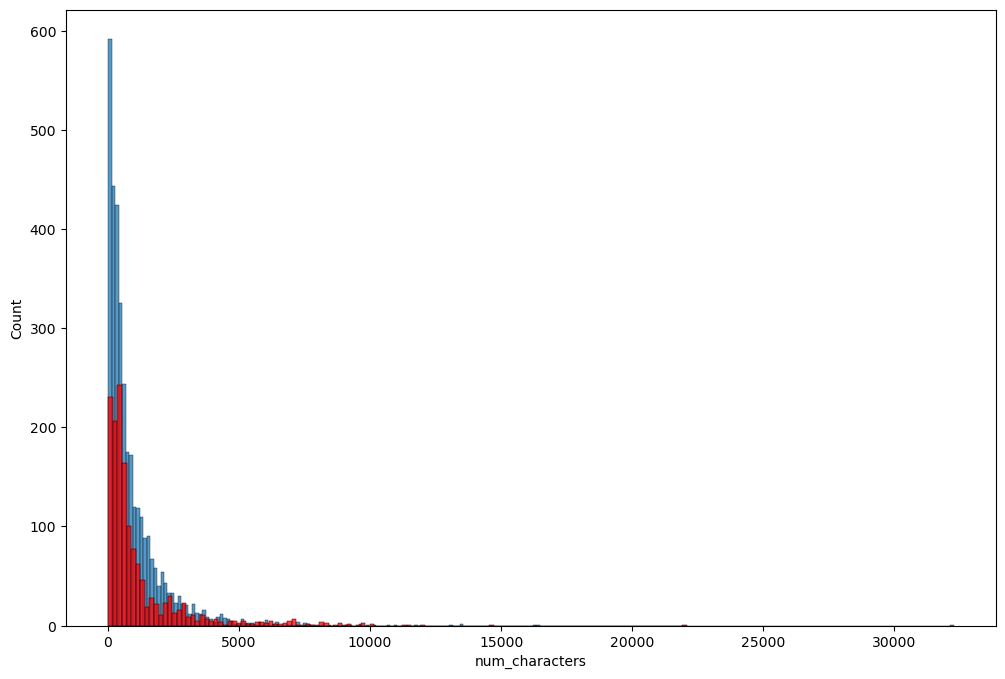

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red') #ham mails are composed of more number of characters

<AxesSubplot:xlabel='num_words', ylabel='Count'>

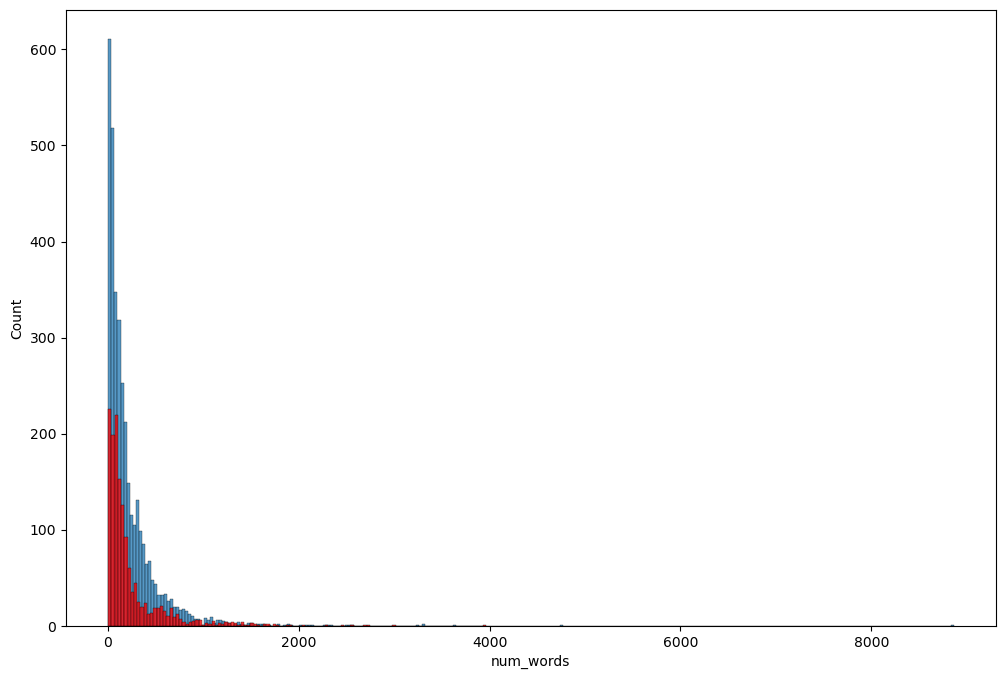

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words']) #ham
sns.histplot(df[df['target']==1]['num_words'], color = 'red') #spam

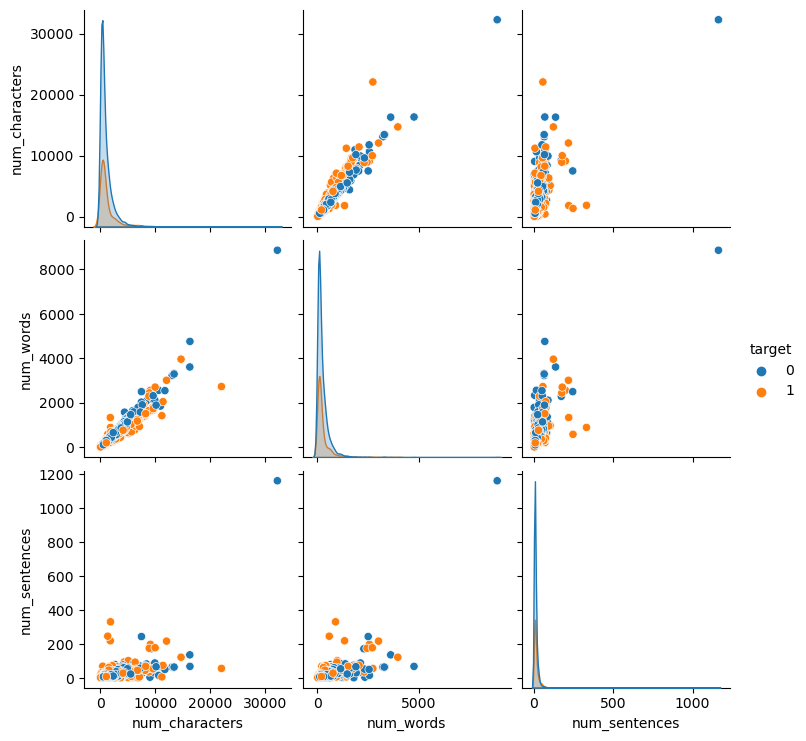

In [38]:
sns.pairplot(df,hue='target')

In [39]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.074794,0.014425,0.098752
num_characters,0.074794,1.000000,0.970492,0.655812
num_words,0.014425,0.970492,1.000000,0.717001
num_sentences,0.098752,0.655812,0.717001,1.000000


<AxesSubplot:>

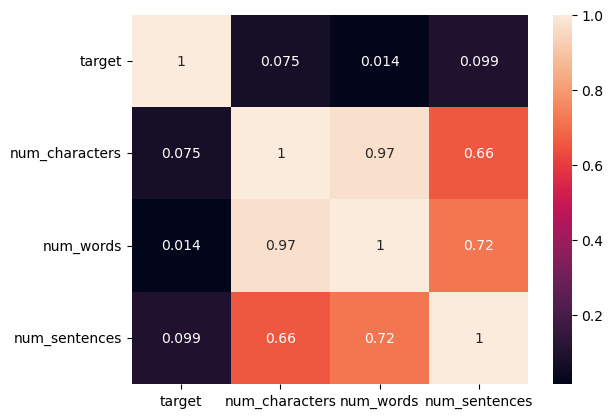

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
 
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
transform_text('Subject: fw : ercot load comparison\r\n- - - - - original message - - - - -\r\nfrom : gilbert - smith , doug\r\nsent : tuesday , may 22 , 2001 8 : 38 am\r\nto : tmartin @ enron . com\r\nsubject : ercot load comparison\r\ntom ,\r\nhere is an answer for you vis a vis load growth .\r\nhope it helps ,\r\ndoug\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by doug gilbert - smith / corp / enron on 05 / 22 / 2001 08 : 35 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : kevin cline / enron @ enronxgate on 05 / 21 / 2001 03 : 26 pm\r\nto : doug gilbert - smith / corp / enron @ enron\r\ncc : eric saibi / corp / enron @ enron\r\nsubject : ercot load comparison\r\nplease find attached spreadsheet that compares hot days from may 2000 and may 2001 . there are two tabs , one tab contains the days may 16 - 18 , 2000 and the other tab contains the days may 14 - 18 , 2001 . each tab contains both the load data and temp data particular to the days in question . the days most directly comparable are may 17 , 2001 ( thursday ) and may 18 , 2000 ( thursday ) , although the two days preceding may 18 , 2000 were slightly warmer than the two days preceding may 17 , 2001 . the peak on 5 / 17 / 2001 , 44 , 923 mw , is 2 . 78 % higher than the peak on 5 / 18 / 2000 , 43 , 709 mw . with similarly warm days before 5 / 17 / 2001 as there were before 5 / 18 / 2000 , the peak would obviously have been even higher . this would put the year - over - year growth in excess of 3 % . i believe this falls right in line with the growth rate year - over - year from an earlier analysis , somewhere in the range of 3 . 5 % to 4 % .\r\nlet me know if you have any questions or comments .')

'subject fw ercot load comparison origin messag gilbert smith doug sent tuesday may 22 2001 8 38 tmartin enron com subject ercot load comparison tom answer vi vi load growth hope help doug forward doug gilbert smith corp enron 05 22 2001 08 35 kevin cline enron enronxg 05 21 2001 03 26 pm doug gilbert smith corp enron enron cc eric saibi corp enron enron subject ercot load comparison pleas find attach spreadsheet compar hot day may 2000 may 2001 two tab one tab contain day may 16 18 2000 tab contain day may 14 18 2001 tab contain load data temp data particular day question day directli compar may 17 2001 thursday may 18 2000 thursday although two day preced may 18 2000 slightli warmer two day preced may 17 2001 peak 5 17 2001 44 923 mw 2 78 higher peak 5 18 2000 43 709 mw similarli warm day 5 17 2001 5 18 2000 peak would obvious even higher would put year year growth excess 3 believ fall right line growth rate year year earlier analysi somewher rang 3 5 4 let know question comment'

In [46]:
transform_text('I loved the Lectures on Machine learning. How about you?')


'love lectur machin learn'

In [47]:
df['text'][20]

'Subject: fw : ercot load comparison\r\n- - - - - original message - - - - -\r\nfrom : gilbert - smith , doug\r\nsent : tuesday , may 22 , 2001 8 : 38 am\r\nto : tmartin @ enron . com\r\nsubject : ercot load comparison\r\ntom ,\r\nhere is an answer for you vis a vis load growth .\r\nhope it helps ,\r\ndoug\r\n- - - - - - - - - - - - - - - - - - - - - - forwarded by doug gilbert - smith / corp / enron on 05 / 22 / 2001 08 : 35 am - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\nfrom : kevin cline / enron @ enronxgate on 05 / 21 / 2001 03 : 26 pm\r\nto : doug gilbert - smith / corp / enron @ enron\r\ncc : eric saibi / corp / enron @ enron\r\nsubject : ercot load comparison\r\nplease find attached spreadsheet that compares hot days from may 2000 and may 2001 . there are two tabs , one tab contains the days may 16 - 18 , 2000 and the other tab contains the days may 14 - 18 , 2001 . each tab contains both the load data and temp data particular to the days in question . the days most

In [48]:
import string
from nltk.corpus import stopwords

# Create a set of stopwords for faster membership checking
stopwords_set = set(stopwords.words('english'))

# Function to remove stopwords and punctuation from text
def transform_text(text):
    # Split the text into individual words
    words = text.split()
  
    # Remove stopwords and punctuation
    filtered_words = [word for word in words if word.lower() not in stopwords_set and word not in string.punctuation]
  
    # Join the filtered words back into a single string
    transformed_text = ' '.join(filtered_words)
  
    return transformed_text

# Apply the transformation to the 'text' column
df['text'] = df['text'].str.replace('[{}]'.format(string.punctuation), '')  # Remove punctuation
df['text'] = df['text'].apply(transform_text)

C:\Users\DEEPAK KUMAR JHA\AppData\Local\Temp\ipykernel_18420\3127119175.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[{}]'.format(string.punctuation), '')  # Remove punctuation


In [49]:
df['text'].apply(transform_text)

0       Subject enron methanol meter 988291 follow not...
1       Subject hpl nom january 9 2001 see attached fi...
2       Subject neon retreat ho ho ho around wonderful...
3       Subject photoshop windows office cheap main tr...
4       Subject indian springs deal book teco pvr reve...
                              ...                        
5165    Subject fw crosstex energy driscoll ranch 1 3 ...
5166    Subject put 10 ft transport volumes decreased ...
5167    Subject 3 4 2000 following noms hpl take extra...
5169    Subject industrial worksheets august 2000 acti...
5170    Subject important online banking alert dear va...
Name: text, Length: 4993, dtype: object

In [50]:
df['transform_text'] = df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,Subject enron methanol meter 988291 follow not...,327,68,3,Subject enron methanol meter 988291 follow not...
1,0,Subject hpl nom january 9 2001 see attached fi...,97,24,1,Subject hpl nom january 9 2001 see attached fi...
2,0,Subject neon retreat ho ho ho around wonderful...,2524,551,20,Subject neon retreat ho ho ho around wonderful...
3,1,Subject photoshop windows office cheap main tr...,414,49,3,Subject photoshop windows office cheap main tr...
4,0,Subject indian springs deal book teco pvr reve...,336,71,3,Subject indian springs deal book teco pvr reve...


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

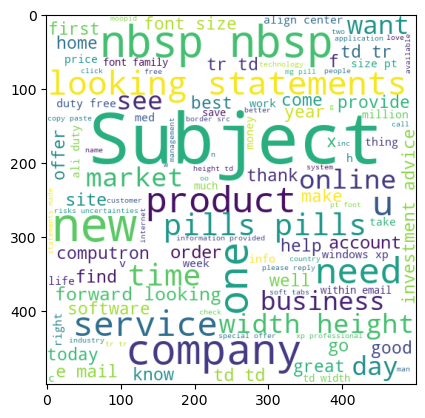

In [54]:
plt.imshow(spam_wc)

In [55]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

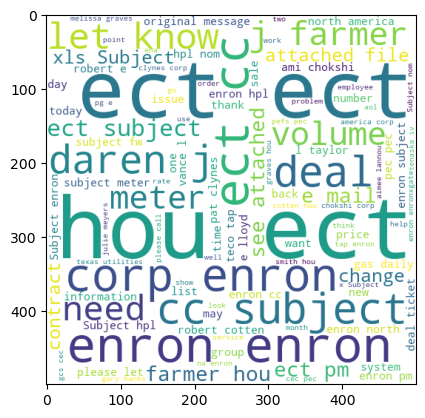

In [56]:
plt.imshow(ham_wc)

In [57]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist(): #spam
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
spam_corpus

['Subject',
 'photoshop',
 'windows',
 'office',
 'cheap',
 'main',
 'trending',
 'abasements',
 'darer',
 'prudently',
 'fortuitous',
 'undergone',
 'lighthearted',
 'charm',
 'orinoco',
 'taster',
 'railroad',
 'affluent',
 'pornographic',
 'cuvier',
 'irvin',
 'parkhouse',
 'blameworthy',
 'chlorophyll',
 'robed',
 'diagrammatic',
 'fogarty',
 'clears',
 'bayda',
 'inconveniencing',
 'managing',
 'represented',
 'smartness',
 'hashish',
 'academies',
 'shareholders',
 'unload',
 'badness',
 'danielson',
 'pure',
 'caffein',
 'spaniard',
 'chargeable',
 'levin',
 'Subject',
 'looking',
 'medication',
 'best',
 'source',
 'difficult',
 'make',
 'material',
 'condition',
 'better',
 'best',
 'law',
 'easy',
 'enough',
 'ruin',
 'bad',
 'laws',
 'excuse',
 'found',
 'best',
 'simpliest',
 'site',
 'medication',
 'net',
 'perscription',
 'easy',
 'delivery',
 'private',
 'secure',
 'easy',
 'better',
 'see',
 'rightly',
 'pound',
 'week',
 'squint',
 'million',
 'got',
 'anything',
 'eve

In [59]:
len(spam_corpus)

196521

In [60]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,Subject,1462
1,3,1229
2,com,989
3,http,980
4,2,853
5,company,728
6,1,710
7,0,688
8,e,625
9,www,586


C:\Users\DEEPAK KUMAR JHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


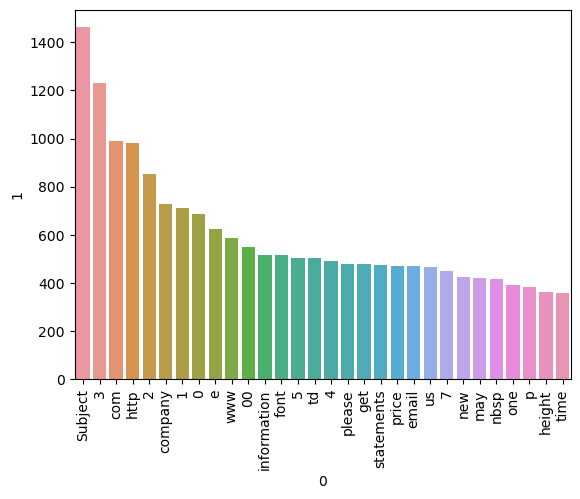

In [61]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

In [62]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist(): #spam
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
ham_corpus

['Subject',
 'enron',
 'methanol',
 'meter',
 '988291',
 'follow',
 'note',
 'gave',
 'monday',
 '4',
 '3',
 '00',
 'preliminary',
 'flow',
 'data',
 'provided',
 'daren',
 'please',
 'override',
 'pop',
 'daily',
 'volume',
 'presently',
 'zero',
 'reflect',
 'daily',
 'activity',
 'obtain',
 'gas',
 'control',
 'change',
 'needed',
 'asap',
 'economics',
 'purposes',
 'Subject',
 'hpl',
 'nom',
 'january',
 '9',
 '2001',
 'see',
 'attached',
 'file',
 'hplnol',
 '09',
 'xls',
 'hplnol',
 '09',
 'xls',
 'Subject',
 'neon',
 'retreat',
 'ho',
 'ho',
 'ho',
 'around',
 'wonderful',
 'time',
 'year',
 'neon',
 'leaders',
 'retreat',
 'time',
 'know',
 'time',
 'year',
 'extremely',
 'hectic',
 'tough',
 'think',
 'anything',
 'past',
 'holidays',
 'life',
 'go',
 'past',
 'week',
 'december',
 '25',
 'january',
 '1',
 'like',
 'think',
 'minute',
 'calender',
 'handed',
 'beginning',
 'fall',
 'semester',
 'retreat',
 'scheduled',
 'weekend',
 'january',
 '5',
 '6',
 'youth',
 'ministers

In [64]:
len(ham_corpus)

380934

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [67]:
x= np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [68]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x= scaler.fit_transform(x)

In [69]:
x.shape #(total mails, total words)

(4993, 3001)

In [70]:
y = df['target'].values

In [71]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.955955955955956
[[671  26]
 [ 18 284]]
0.9161290322580645


In [77]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.92992992992993
[[646  51]
 [ 19 283]]
0.8473053892215568


In [78]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9219219219219219
[[645  52]
 [ 26 276]]
0.8414634146341463


In [79]:
#tfidf and mnb

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel = 'sigmoid', gamma= 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear')
rfc = RandomForestClassifier(n_estimators=50, random_state= 2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'Adaboost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb

}

In [83]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [84]:
train_classifier(svc,x_train, y_train, x_test, y_test)

C:\Users\DEEPAK KUMAR JHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6976976976976977, 0.0)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\DEEPAK KUMAR JHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.6976976976976977
Precision -  0.0


C:\Users\DEEPAK KUMAR JHA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.7107107107107107
Precision -  0.5371428571428571
For  NB
Accuracy -  0.92992992992993
Precision -  0.8473053892215568
For  DT
Accuracy -  0.8378378378378378
Precision -  0.6528384279475983
For  LR
Accuracy -  0.97997997997998
Precision -  0.97
For  RF
Accuracy -  0.978978978978979
Precision -  0.9488817891373802
For  Adaboost
Accuracy -  0.9529529529529529
Precision -  0.8899082568807339
For  BgC
Accuracy -  0.955955955955956
Precision -  0.8932926829268293
For  ETC
Accuracy -  0.9819819819819819
Precision -  0.9551282051282052
For  GBDT
Accuracy -  0.953953953953954
Precision -  0.9210526315789473
For  xgb
Accuracy -  0.963963963963964
Precision -  0.9130434782608695


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [87]:
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.979980,0.970000
8,ETC,0.981982,0.955128
5,RF,0.978979,0.948882
9,GBDT,0.953954,0.921053
10,xgb,0.963964,0.913043
7,BgC,0.955956,0.893293
6,Adaboost,0.952953,0.889908
2,NB,0.929930,0.847305
3,DT,0.837838,0.652838
1,KN,0.710711,0.537143


In [88]:
# rfc = RandomForestClassifier(n_estimators=50, random_state= 2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [89]:
# clfs = {
    
#     'RF' : rfc,
#     'Adaboost' : abc,
#     'BgC' : bc,
#     'ETC' : etc,
#     'GBDT' : gbdt,
#     'xgb' : xgb

# }

In [90]:
# def train_classifier(clf, x_train, y_train, x_test, y_test):
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
    
#     return accuracy, precision

In [91]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [92]:
# performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [93]:
# print(performance_df1)


In [94]:
data = {'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores}
print(data)
performance_df = pd.DataFrame(data).sort_values('Precision', ascending=True)

print(performance_df)


{'Algorithm': ['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'Adaboost', 'BgC', 'ETC', 'GBDT', 'xgb'], 'Accuracy': [0.6976976976976977, 0.7107107107107107, 0.92992992992993, 0.8378378378378378, 0.97997997997998, 0.978978978978979, 0.9529529529529529, 0.955955955955956, 0.9819819819819819, 0.953953953953954, 0.963963963963964], 'Precision': [0.0, 0.5371428571428571, 0.8473053892215568, 0.6528384279475983, 0.97, 0.9488817891373802, 0.8899082568807339, 0.8932926829268293, 0.9551282051282052, 0.9210526315789473, 0.9130434782608695]}
   Algorithm  Accuracy  Precision
0        SVC  0.697698   0.000000
1         KN  0.710711   0.537143
3         DT  0.837838   0.652838
2         NB  0.929930   0.847305
6   Adaboost  0.952953   0.889908
7        BgC  0.955956   0.893293
10       xgb  0.963964   0.913043
9       GBDT  0.953954   0.921053
5         RF  0.978979   0.948882
8        ETC  0.981982   0.955128
4         LR  0.979980   0.970000


In [95]:
performance_df1= pd.melt(performance_df, id_vars = 'Algorithm')


In [96]:
print(performance_df1)

   Algorithm   variable     value
0        SVC   Accuracy  0.697698
1         KN   Accuracy  0.710711
2         DT   Accuracy  0.837838
3         NB   Accuracy  0.929930
4   Adaboost   Accuracy  0.952953
5        BgC   Accuracy  0.955956
6        xgb   Accuracy  0.963964
7       GBDT   Accuracy  0.953954
8         RF   Accuracy  0.978979
9        ETC   Accuracy  0.981982
10        LR   Accuracy  0.979980
11       SVC  Precision  0.000000
12        KN  Precision  0.537143
13        DT  Precision  0.652838
14        NB  Precision  0.847305
15  Adaboost  Precision  0.889908
16       BgC  Precision  0.893293
17       xgb  Precision  0.913043
18      GBDT  Precision  0.921053
19        RF  Precision  0.948882
20       ETC  Precision  0.955128
21        LR  Precision  0.970000


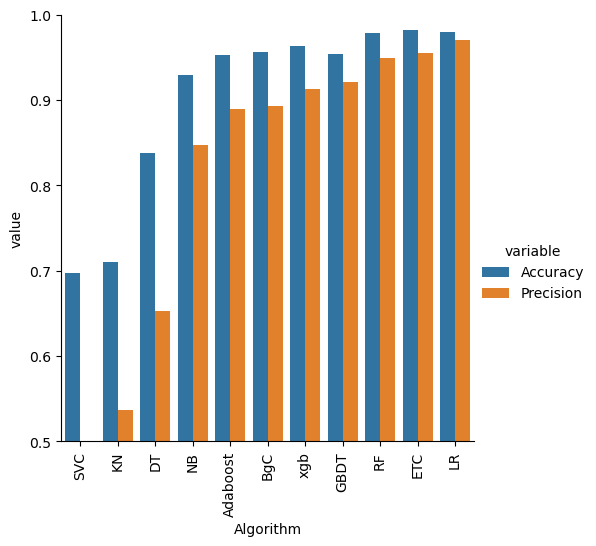

In [97]:
sns.catplot(x= 'Algorithm', y='value', hue='variable', data= performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [99]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [100]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [101]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [103]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.697698,0.000000,0.697698,0.000000,0.697698,0.000000,0.697698,0.000000
1,KN,0.710711,0.537143,0.710711,0.537143,0.710711,0.537143,0.710711,0.537143
2,DT,0.837838,0.652838,0.837838,0.652838,0.837838,0.652838,0.837838,0.652838
3,NB,0.929930,0.847305,0.929930,0.847305,0.929930,0.847305,0.929930,0.847305
4,Adaboost,0.952953,0.889908,0.952953,0.889908,0.952953,0.889908,0.952953,0.889908
5,BgC,0.955956,0.893293,0.955956,0.893293,0.955956,0.893293,0.955956,0.893293
6,xgb,0.963964,0.913043,0.963964,0.913043,0.963964,0.913043,0.963964,0.913043
7,GBDT,0.953954,0.921053,0.953954,0.921053,0.953954,0.921053,0.953954,0.921053
8,RF,0.978979,0.948882,0.978979,0.948882,0.978979,0.948882,0.978979,0.948882
9,ETC,0.981982,0.955128,0.981982,0.955128,0.981982,0.955128,0.981982,0.955128


In [110]:
def transform_text(text):
    # Implement your text preprocessing steps here
    return text

# Apply the text preprocessing function to the 'text' column
df['transform_text'] = df['text'].apply(transform_text)

# Extract features using TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transform_text']).toarray()

# Add 'num_characters' as an additional feature
x = np.hstack((x, df['num_characters'].values.reshape(-1, 1)))

# Select the target variable
y = df['target'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Initialize and train the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.90%


In [120]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the input mail 
input_mail = ["Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin"]
# Preprocess the input mail
def transform_text(text):
    # Implement your text preprocessing steps here
    return text

# Apply the text preprocessing function to the input mail
transformed_input_mail = [transform_text(mail) for mail in input_mail]

# Extract features using TF-IDF vectorizer (fit and transform)
tfidf = TfidfVectorizer(max_features=3000)
# Fit the TF-IDF vectorizer on the training data
tfidf.fit(df['transform_text'])
# Transform the input mail using the fitted vectorizer
input_data_features = tfidf.transform(transformed_input_mail).toarray()

# Add 'num_characters' as an additional feature (if required)
input_data_features = np.hstack((input_data_features, [[len(mail) for mail in input_mail]]))

# Make predictions using the trained RF model
prediction = rfc.predict(input_data_features)

# Check the prediction
if prediction[0] == 0:
    print("The input mail is classified as 'ham'.")
else:
    print("The input mail is classified as 'spam'.")

The input mail is classified as 'spam'.


In [124]:
def transform_text(text):
    # Implement your text preprocessing steps here
    return text

# Apply the text preprocessing function to the 'text' column
df['num_characters'] = df['text'].apply(len)

df['transform_text'] = df['text'].apply(transform_text)

# Extract features using TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transform_text']).toarray()

# Add 'num_characters' as an additional feature
x = np.hstack((x, df['num_characters'].values.reshape(-1, 1)))

# Select the target variable
y = df['label'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Initialize and train the Random Forest classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.72%


In [125]:
input_mail = ["Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin"]
# Preprocess the input mail
def transform_text(text):
    # Implement your text preprocessing steps here
    return text

# Apply the text preprocessing function to the input mail
transformed_input_mail = [transform_text(mail) for mail in input_mail]

# Extract features using TF-IDF vectorizer (fit and transform)
tfidf = TfidfVectorizer(max_features=3000)
# Fit the TF-IDF vectorizer on the training data
tfidf.fit(df['transform_text'])
# Transform the input mail using the fitted vectorizer
input_data_features = tfidf.transform(transformed_input_mail).toarray()

# Add 'num_characters' as an additional feature (if required)
input_data_features = np.hstack((input_data_features, [[len(mail) for mail in input_mail]]))

# Make predictions using the trained RF model
prediction = mnb.predict(input_data_features)

# Check the prediction
if prediction[0] == 0:
    print("The input mail is classified as 'ham'.")
else:
    print("The input mail is classified as 'spam'.")

The input mail is classified as 'spam'.
